In [1]:
# 시계열 분석 
# Series가 시계열 데이터를 저장하는 포멧 ( 기본 ) + 인덱스 DateTimeIndex
# Index 는 행 이름, columns 열 이름 
# 데이터 프레임이 시계열 다루는 것을 기본으로 생성 
# 시계열 데이터는 금융, 경제, 생태학, 신경과학, 물리학 등에 사용되는 데이터 포맷 
# 시간 - core : datetime64 형태로 저장
# pandas 에서는 timestamp로 저장
    # 나노초를 기준으로 함 
# DateTimeIndex를 생성하는 방법은

# to_datetime : 기존에 있는 데이터를 시간 인덱스로 생성 
# date_range : 범위값으로 생성

# 시계열 데이터의 표현은 series에 index가 DateTimeIndex인 것
# 시간을 표현하는 기본  타입은 time, date, datetime, timedelta 

# datetime64 자료형으로 timestamp로 저장 정밀도는 나노초를 갖는다.(1970년 1월 1일 기준)
#=> DatetimeIndex로 생성해서 사용 

# 시간 
    # UTC : Coordinated Universal Time 국제 표준 시  = 표준
    # GMT는 Greenwich Mean Time
    # 시간을 문자열로 처리하기 위해 iso8601(시간을 문자로 표현하는 표준) 를 사용

# shift- 날짜 비교를 위해서나 처리를 위해서(날짜 조정) 
# resample - 일정한 간격으로 데이터를 맞추거나 중복된 데이터를 맞춤 
# rolling (이동평균법을 사용하기 위한 절차)
     # 고주파를 저주파로 변경 (변동을 줄인다. 데이터의 변화를 파악하기 위해 )

In [2]:
import numpy as np
import pandas as pd

import pytz
# import dateutil.parser

print(pytz.common_timezones[-5:]) # timezone
tz = pytz.timezone('US/Eastern')
print(tz)

# T: 분, W: 주별, WOM-2THU : 각 달의 두 번째 목요일
# Q-JAN : 각 분기별 첫 달의 마지막
# Q-DEC : 분기별 마지막 달을 기준으로 

rng = pd.date_range('3/9/2012 9:30', periods=6, freq='Q-JAN')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts.index)
print(pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC'))
ts_utc=ts.tz_localize('UTC') # 로컬라이즈: 시간대 변경 
print(ts_utc.index)
print(ts_utc.tz_convert('US/Eastern'))
print(ts.index.tz_localize('Asia/Seoul'))

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']
US/Eastern
DatetimeIndex(['2012-04-30 09:30:00', '2012-07-31 09:30:00',
               '2012-10-31 09:30:00', '2013-01-31 09:30:00',
               '2013-04-30 09:30:00', '2013-07-31 09:30:00'],
              dtype='datetime64[ns]', freq='Q-JAN')
DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')
DatetimeIndex(['2012-04-30 09:30:00+00:00', '2012-07-31 09:30:00+00:00',
               '2012-10-31 09:30:00+00:00', '2013-01-31 09:30:00+00:00',
               '2013-04-30 09:30:00+00:00', '2013-07-31 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='Q

In [3]:
p= pd.Period('2012', freq = 'A-DEC')
print(p)
print(p+5)
print(p-2)
r= pd.Period('2014', freq = 'A-DEC')
print(r)
rng = pd.period_range('1/1/2012', '6/12/2012', freq = 'M')
print("범위값", rng)
res =pd.Series(np.random.randn(6), index=rng)
values=['20130301', '20130201','20130101']
index=pd.PeriodIndex(values, freq='Q-DEC')
print(index)

2012
2017
2010
2014
범위값 PeriodIndex(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06'], dtype='period[M]', freq='M')
PeriodIndex(['2013Q1', '2013Q1', '2013Q1'], dtype='period[Q-DEC]', freq='Q-DEC')


In [4]:
from datetime import datetime
now = datetime.now()
print(now)
print(now.year, now.month, now.day)
delta = datetime(2017, 11, 29) - datetime(2017, 1, 11, 0, 0)
print("timedelta 시간차값", delta)
print(delta.days)


2018-07-27 10:23:31.192466
2018 7 27
timedelta 시간차값 322 days, 0:00:00
322


In [5]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)

stamp = datetime(2018, 11, 10)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

2018-11-10 00:00:00
2018-11-10


In [7]:
from pandas import Series, DataFrame
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
        datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.108706
2011-01-05   -0.802571
2011-01-07   -0.648675
2011-01-08   -1.246804
2011-01-10   -0.626879
2011-01-12    0.446437
dtype: float64

In [8]:
print(type(ts))
print(ts.index)
print(ts.index.dtype)

<class 'pandas.core.series.Series'>
DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)
datetime64[ns]


In [10]:
ts['1/10/2011']
ts['20110110']

-0.6268790963293629

In [11]:
longer_ts = Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.202392
2000-01-02   -0.099319
2000-01-03    0.310475
2000-01-04    0.458481
2000-01-05    1.460427
2000-01-06    1.094729
2000-01-07   -1.064539
2000-01-08   -1.760076
2000-01-09    0.452218
2000-01-10    0.234156
2000-01-11    0.102340
2000-01-12   -1.186927
2000-01-13    0.739731
2000-01-14   -0.273491
2000-01-15    0.906280
2000-01-16   -0.482983
2000-01-17    1.384653
2000-01-18   -0.324325
2000-01-19    0.164470
2000-01-20   -0.359671
2000-01-21    0.300161
2000-01-22    0.996273
2000-01-23    1.256053
2000-01-24   -0.519333
2000-01-25   -0.112127
2000-01-26    1.498591
2000-01-27   -0.412638
2000-01-28   -0.498105
2000-01-29    0.038048
2000-01-30   -0.020854
                ...   
2002-08-28   -0.038581
2002-08-29   -2.201532
2002-08-30    0.225822
2002-08-31   -0.022310
2002-09-01   -2.048272
2002-09-02   -0.963837
2002-09-03   -0.708639
2002-09-04    0.757782
2002-09-05   -0.562095
2002-09-06   -0.216433
2002-09-07   -2.481103
2002-09-08   -0.436120
2002-09-09 

In [14]:
longer_ts['2001-05']

2001-05-01   -0.670154
2001-05-02    1.682750
2001-05-03    1.865261
2001-05-04   -0.866113
2001-05-05   -0.379310
2001-05-06   -1.299503
2001-05-07    0.079699
2001-05-08   -0.019144
2001-05-09    0.059396
2001-05-10    0.191722
2001-05-11   -0.609145
2001-05-12    0.513020
2001-05-13    0.161961
2001-05-14   -2.088363
2001-05-15    1.096442
2001-05-16    0.744922
2001-05-17    1.209084
2001-05-18    1.104170
2001-05-19   -0.479628
2001-05-20   -1.084896
2001-05-21   -0.368156
2001-05-22   -0.152979
2001-05-23   -0.663846
2001-05-24    1.125185
2001-05-25    1.144305
2001-05-26   -0.018476
2001-05-27    1.319989
2001-05-28   -2.061478
2001-05-29    0.439186
2001-05-30    0.198307
2001-05-31   -0.046766
Freq: D, dtype: float64

In [15]:
ts[datetime(2011, 1, 7)]

-0.6486749781668678

In [16]:
ts.truncate(after='1/9/2011')

2011-01-02    0.108706
2011-01-05   -0.802571
2011-01-07   -0.648675
2011-01-08   -1.246804
dtype: float64

In [20]:
dates = pd.date_range('1/1/2018', periods=100, freq='W-MON')
long_df = DataFrame(np.random.randn(100, 4), index = dates, columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['6-2018']
long_df.loc['2018-6']
long_df.loc['2018']

,Colorado,Texas,New York,Ohio
2018-01-01,0.834763,-0.216858,-0.895065,-2.698668
2018-01-08,-0.084493,1.382058,0.353857,1.915880
2018-01-15,-0.570217,-1.087950,0.861744,0.635159
2018-01-22,-0.156658,0.282906,-0.317661,-0.874153
2018-01-29,0.828949,-1.145723,-0.227773,0.185687
2018-02-05,-1.760708,-0.891966,-1.312898,1.497066
2018-02-12,-1.061433,0.123258,-1.024243,-2.238482
2018-02-19,-0.875263,-0.250469,-0.272767,0.240429
2018-02-26,0.019423,-0.758478,-1.198148,0.004965
2018-03-05,-1.057306,-0.640879,-0.902745,-1.038928


In [22]:
rng = pd.date_range('1/1/2014', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
print(ts)
print(ts.resample('5min').ohlc())

2014-01-01 00:00:00     0
2014-01-01 00:01:00     1
2014-01-01 00:02:00     2
2014-01-01 00:03:00     3
2014-01-01 00:04:00     4
2014-01-01 00:05:00     5
2014-01-01 00:06:00     6
2014-01-01 00:07:00     7
2014-01-01 00:08:00     8
2014-01-01 00:09:00     9
2014-01-01 00:10:00    10
2014-01-01 00:11:00    11
Freq: T, dtype: int32
                     open  high  low  close
2014-01-01 00:00:00     0     4    0      4
2014-01-01 00:05:00     5     9    5      9
2014-01-01 00:10:00    10    11   10     11


In [23]:
print('5분',ts.resample('5min').sum())

5분 2014-01-01 00:00:00    10
2014-01-01 00:05:00    35
2014-01-01 00:10:00    21
Freq: 5T, dtype: int32


In [34]:
frame = pd.DataFrame(np.random.randn(2,4), index=pd.date_range('1/1/2014', periods=2, freq='W-WED'),columns=['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame[:5])
df_daily = frame.resample('D').ffill()
df_daily = frame.resample('D').bfill()
df_daily = frame.resample('D').interpolate(methos='linear')
df_daily = frame.resample('D').interpolate(methos='spline', order=2)
print(df_daily)

            Colorado     Texas  New York      Ohio
2014-01-01 -1.629874 -0.005079 -0.820144  0.730044
2014-01-08  1.239503  0.927422 -0.899063  0.578253
            Colorado     Texas  New York      Ohio
2014-01-01 -1.629874 -0.005079 -0.820144  0.730044
2014-01-02 -1.219963  0.128136 -0.831418  0.708359
2014-01-03 -0.810052  0.261350 -0.842692  0.686675
2014-01-04 -0.400141  0.394565 -0.853967  0.664990
2014-01-05  0.009770  0.527779 -0.865241  0.643306
2014-01-06  0.419681  0.660994 -0.876515  0.621622
2014-01-07  0.829592  0.794208 -0.887789  0.599937
2014-01-08  1.239503  0.927422 -0.899063  0.578253


In [35]:
import pandas as DatetimeIndexResampler
frame = pd.DataFrame(np.random.randn(2,4), index = pd.date_range('1/1/2014', periods=2, freq='W-WED'),columns=['Colorado', 'Texas', 'New York', 'Ohio'])
close_px_all=pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
print(close_px_all.head())
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

fig, axes = plt.subplots(nrows=2, ncols=1, shares=True, sharey=True, figsize(12, 7))


In [36]:
import pandas as pd
df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0] 

import FinanceDataReader as fdr
fdr.__version__

'0.5.0'

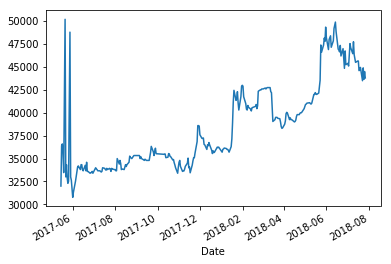

In [41]:
import matplotlib.pyplot as plt
df = fdr.DataReader('267290', '2017')
df.head(10)
df['Close'].plot()
plt.show()

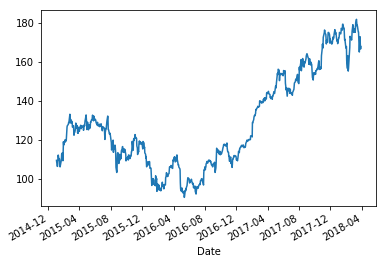

In [44]:
df = fdr.DataReader('AAPL', '2015-01-01', '2018-03-30')
df.tail()
df['Close'].plot()
plt.show()

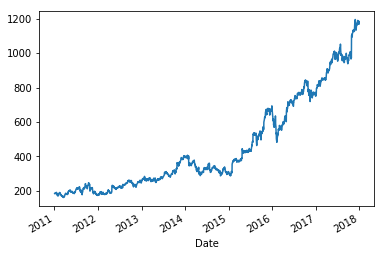

In [45]:
df = fdr.DataReader('AMZN', '2011', '2018')
df.tail()
df['Close'].plot()
plt.show()

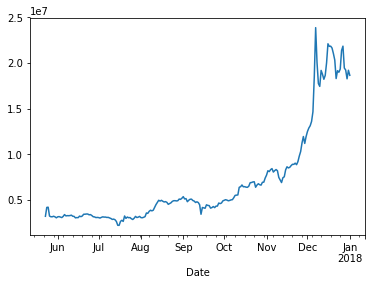

In [46]:
df = fdr.DataReader('BTC/KRW', '2011', '2018')
df['Close'].plot()
plt.show()

In [64]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A2F5470>,
      dtype=object)

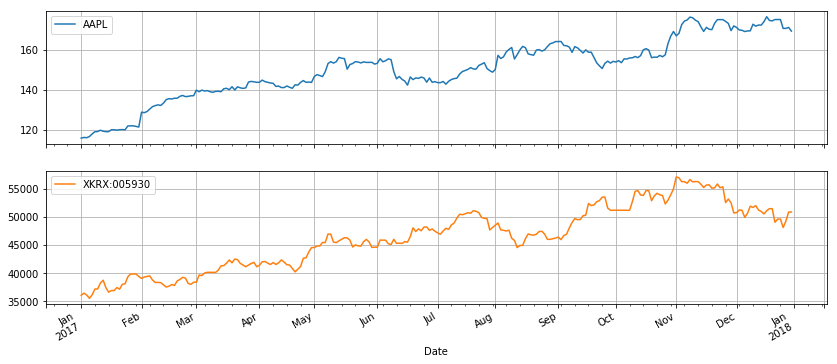

In [66]:
import pandas_datareader as pdr

df = pdr.DataReader(['AAPL' ,'XKRX:005930'], 'morningstar','2017-01-01', '2017-12-30')
plt.rcParams["figure.figsize"] = [14,6]
plt.rcParams["axes.grid"] = True
df.unstack(level=0)['Close'].plot(subplots=True)

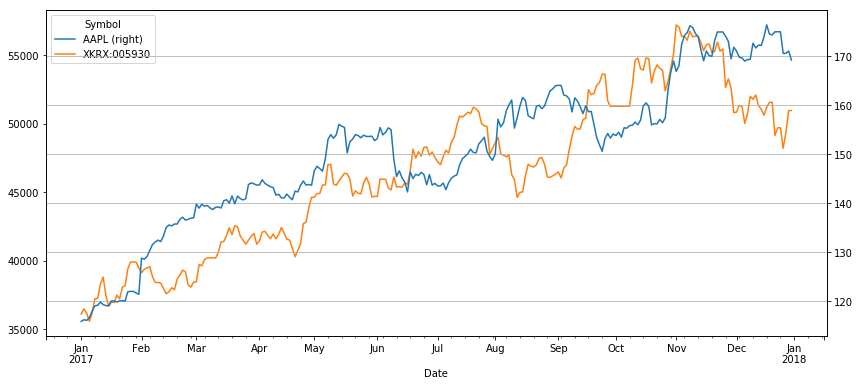

In [68]:
df.unstack(level=0)["Close"].plot(secondary_y="AAPL")
plt.show()

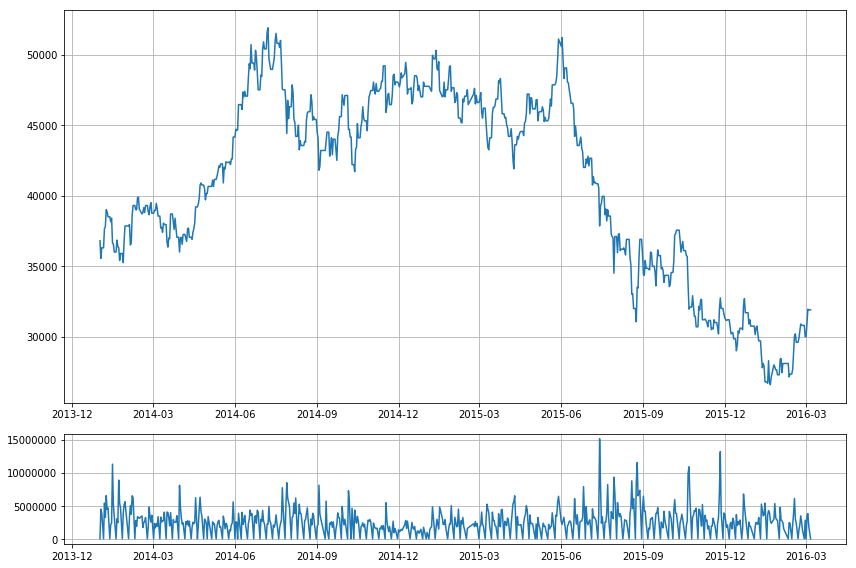

In [70]:
# 거래량과 주가의 비교
hynix = fdr.DataReader('000660', '2014-01-01',"2016-03-06")
hynix.head(10)
fig = plt.figure(figsize = (12,8))
top_axes = plt.subplot2grid((4,4),(0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

top_axes.plot(hynix.index, hynix['Close'], label='Adjusted Close')
bottom_axes.plot(hynix.index, hynix['Volume'])

plt.tight_layout()
plt.show()

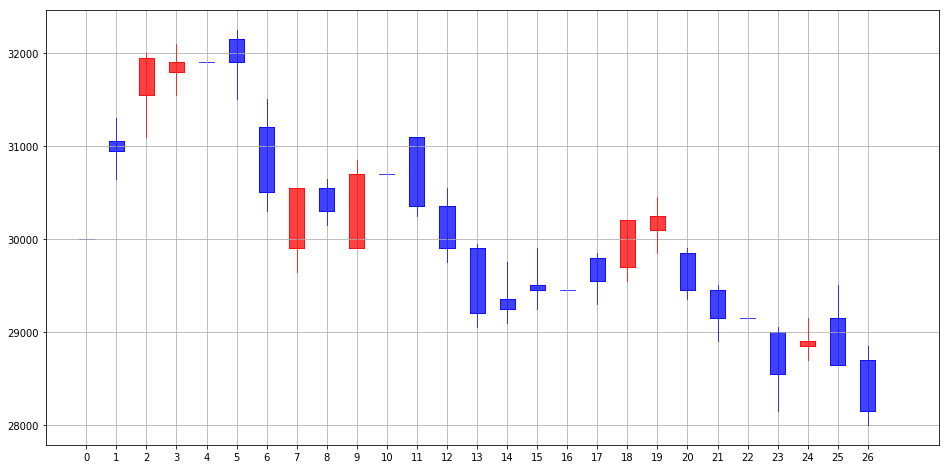

In [75]:
import datetime
import matplotlib.ticker as ticker
import mpl_finance as matfin
 
start = datetime.datetime(2016,3,1)
end = datetime.datetime(2016, 3,31)
hynix = fdr.DataReader('000660', start, end)
hynix.head(10)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

day_list=range(len(hynix))
name_list = []
for day in hynix.index:
    name_list.append(day.strftime('%d'))

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(day_list))

matfin.candlestick2_ohlc(ax, hynix['Open'], hynix['High'], hynix['Low'],
                         hynix['Close'], width=0.5, colorup='r', colordown= 'b')
plt.show()

In [78]:
plt.style.use("fivethirtyeight")
from fbprophet import Prophet
